##1. Import the necessary packages to read in the data, plot, and create a linear regression model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

## 2. Read in the hanford.csv file 

In [2]:
df = pd.read_csv('../data/hanford.csv')
df.head()

,County,Exposure,Mortality
0,Umatilla,2.49,147.1
1,Morrow,2.57,130.1
2,Gilliam,3.41,129.9
3,Sherman,1.25,113.5
4,Wasco,1.62,137.5


<img src="images/hanford_variables.png">

* County = Name of county
* Exposure = Index of exposure
* Mortality = Cancer mortality per 100,000 man-years

## 3. Calculate the basic descriptive statistics on the data

In [11]:
print('Mortality interquantile: ', df['Mortality'].quantile(0.75) - df['Mortality'].quantile(0.25))

print('Exposure interquantile: ', df['Exposure'].quantile(0.75) - df['Exposure'].quantile(0.25))


print('Mode:', df.mode)

df.describe()

Mortality interquantile:  47.8
Exposure interquantile:  3.92
Mode: <bound method DataFrame.mode of       County  Exposure  Mortality
0   Umatilla      2.49      147.1
1     Morrow      2.57      130.1
2    Gilliam      3.41      129.9
3    Sherman      1.25      113.5
4      Wasco      1.62      137.5
5  HoodRiver      3.83      162.3
6   Portland     11.64      207.5
7   Columbia      6.41      177.9
8    Clatsop      8.34      210.3>


,Exposure,Mortality
count,9.000000,9.000000
mean,4.617778,157.344444
std,3.491192,34.791346
min,1.250000,113.500000
25%,2.490000,130.100000
50%,3.410000,147.100000
75%,6.410000,177.900000
max,11.640000,210.300000


## 4. Calculate the coefficient of correlation (r) and generate the scatter plot. Does there seem to be a correlation worthy of investigation?

In [4]:
print("The coefficient is {}. It seems worthy of investigation.".format(df.corr()['Exposure']['Mortality']))


The coefficient is 0.9263448207173691. It seems worthy of investigation.


## 5. Create a linear regression model based on the available data to predict the mortality rate given a level of exposure

In [5]:
lm = smf.ols(formula='Mortality~Exposure', data=df).fit()
lm.params

Intercept    114.715631
Exposure       9.231456
dtype: float64

## 6. Plot the linear regression line on the scatter plot of values. Calculate the r^2 (coefficient of determination)

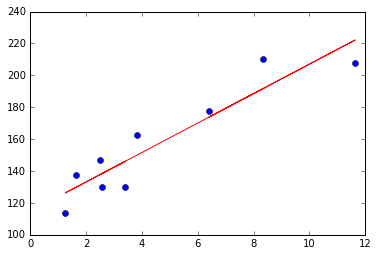

In [6]:
fig, ax = plt.subplots()
ax.plot(df['Exposure'], df['Mortality'], 'o', label="Data")
ax.plot(df['Exposure'], lm.fittedvalues, '-', color='red', label="Prediction")


## 7. Predict the mortality rate (Cancer per 100,000 man years) given an index of exposure = 10

In [7]:
intercept, slope = lm.params
result = slope*10 + intercept
print("The result is {}.".format(result))

The result is 207.0301935284199.
